In [0]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from sklearn.utils import shuffle
import pickle
import os
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!pip3 install tensorflow-gpu==2.0.0-rc

     |████████████████████████████████| 380.5MB 42kB/s 
     |████████████████████████████████| 501kB 63.4MB/s 
     |████████████████████████████████| 4.3MB 48.7MB/s 


In [0]:
import tensorflow as tf
tf.__version__

'2.0.0-rc0'

In [0]:
data_link = "https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip"

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
pwd


'/content'

In [0]:
cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [0]:
pwd

'/content/drive/My Drive/Colab Notebooks'

In [4]:
!pip3 install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9681 sha256=87c5750f9395d438aeac3be07b7f915ae1c1c2c0bd862863758e67376233c4c2
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [5]:
import wget
wget.download(data_link)

'traffic-signs-data.zip'

In [0]:
!unzip -q traffic-signs-data.zip -d data

In [0]:
data_folder = 'data'
train_link = data_folder + '/train.p'
valid_link = data_folder + '/valid.p'
test_link = data_folder + '/test.p'

In [0]:
import pickle
with open(train_link, mode='rb') as f:
  train = pickle.load(f)


In [0]:
with open(valid_link, mode='rb') as f:
  valid = pickle.load(f)

In [0]:
with open(test_link, mode='rb') as f:
  test = pickle.load(f)

In [0]:
trainX = train["features"]
trainY = train["labels"]

In [16]:
trainX.shape # số ảnh, col, row, số channel (R, G, B)

(34799, 32, 32, 3)

In [0]:
trainX[0] # 1 ảnh

array([[[28, 25, 24],
        [27, 24, 23],
        [27, 24, 22],
        ...,
        [32, 28, 24],
        [31, 27, 25],
        [31, 27, 26]],

       [[29, 26, 25],
        [27, 25, 23],
        [27, 25, 23],
        ...,
        [32, 28, 24],
        [31, 27, 24],
        [30, 27, 25]],

       [[28, 26, 26],
        [27, 25, 23],
        [26, 25, 23],
        ...,
        [32, 28, 24],
        [31, 27, 24],
        [30, 27, 25]],

       ...,

       [[27, 24, 23],
        [28, 25, 24],
        [30, 25, 24],
        ...,
        [27, 24, 23],
        [28, 24, 22],
        [29, 25, 22]],

       [[28, 23, 23],
        [29, 24, 24],
        [31, 25, 24],
        ...,
        [27, 24, 23],
        [28, 24, 22],
        [28, 24, 21]],

       [[29, 23, 23],
        [30, 24, 24],
        [32, 24, 23],
        ...,
        [27, 24, 22],
        [27, 23, 21],
        [26, 22, 20]]], dtype=uint8)

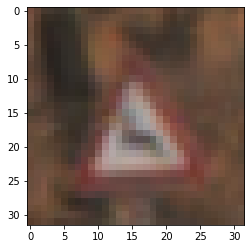

In [0]:
import matplotlib.pyplot as plt
plt.imshow(trainX[300])

In [0]:
# shuffle data để khách quan, đảm bảo 1 lần train có nhiều data
trainX, trainY = shuffle(trainX, trainY)

In [18]:
testX = test["features"]
testY = test["labels"]
print(testX.shape)
print(testY.shape)
testX, testY = shuffle(testX, testY)

(12630, 32, 32, 3)
(12630,)


In [19]:
validX = valid["features"]
validY = valid["labels"]
print(validX.shape)
print(validY.shape)
validX, validY = shuffle(validX, validY)

(4410, 32, 32, 3)
(4410,)


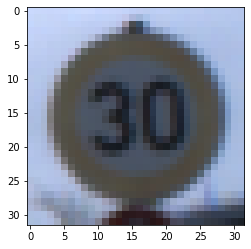

In [0]:
plt.imshow(trainX[0])

In [0]:
trainY[0]

1

In [0]:
classNames = {0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}


In [0]:
classNames[trainY[0]]

'Speed limit (30km/h)'

In [0]:
model = Sequential() # create network

In [0]:
width = 32
height = 32
classes = 43
input_shape = (width, height, 3)

In [0]:
model.add(Conv2D(32, (3,3), padding="same", input_shape=input_shape)) # 32 filters, 3x3 each
# apply 32 filter means increase number of chanels from 3 to 32 => output image size: 32x32x32
# only define input_shape once

In [0]:
model.add(Activation("relu")) # add Activation layer

In [0]:
model.add(BatchNormalization()) # add Batch Norm layer

In [0]:
model.add(Conv2D(32, (3,3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())

In [0]:
model.add(MaxPooling2D(pool_size=(2,2))) # image size decreases after adding max pooling

In [0]:
model.add(Flatten())

In [0]:
model.add(Activation("relu"))
model.add(BatchNormalization())

In [0]:
model.add(Dense(512))
model.add(Activation("relu"))
model.add(BatchNormalization())

In [0]:
model.add(Dense(classes))

In [0]:
model.add(Activation('softmax'))

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0

Prediction

In [0]:
trainX = trainX.astype("float32") / 255.0 # chuẩn hoá các giá trị từ 0 -> 255 sang 0 -> 1 để tránh bias

In [0]:
lb = LabelBinarizer()

In [0]:
trainY = lb.fit_transform(trainY) # để mapping với trainX

In [0]:
validX = validX.astype("float32") / 255.0
validY = lb.fit_transform(validY)

In [38]:
trainY[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [0]:
aug = ImageDataGenerator(width_shift_range=0.2, horizontal_flip=True) # tăng cường data


In [0]:
learning_rate = 1e-2

In [0]:
opt = SGD(learning_rate=learning_rate, momentum=0.9) # learning rate có thể fine-tune

In [0]:
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
batch_size=64

In [0]:
model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size), epochs=20, steps_per_epoch=trainX.shape[0] // batch_size, validation_data=(validX, validY), verbose=1)
# epoc: số lượng lần lặp
# batch size: tách input data thành phần nhỏ để trách out of memory

Epoch 1/20
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
543/543 [==============================] - 44s 82ms/step - loss: 1.0073 - accuracy: 0.7118 - val_loss: 0.9903 - val_accuracy: 0.6984
Epoch 2/20
543/543 [==============================] - 40s 73ms/step - loss: 0.2974 - accuracy: 0.9099 - val_loss: 0.9453 - val_accuracy: 0.7288
Epoch 3/20
543/543 [==============================] - 39s 71ms/step - loss: 0.1855 - accuracy: 0.9444 - val_loss: 0.9438 - val_accuracy: 0.7429
Epoch 4/20
543/543 [==============================] - 39s 72ms/step - loss: 0.1321 - accuracy: 0.9607 - val_loss: 1.1003 - val_accuracy: 0.7440
Epoch 5/20
543/543 [==============================] - 40s 73ms/step - loss: 0.0957 - accuracy: 0.9723 - val_loss: 0.8636 - val_accuracy: 0.7721
Epoch 6/20
543/543 [==============================] - 40s 74ms/step - loss: 0.0741 - accuracy: 0.9783 - val_loss: 0.8695 - val_accuracy: 0.7805
Epoch 7/20
543/543 [======================

In [0]:
model.save("hungnet.h5")

In [0]:
saved_model = tf.keras.models.load_model("hungnet.h5")

In [0]:
testX[0:1].shape

(1, 32, 32, 3)

In [0]:
testX[0].shape

(32, 32, 3)

In [0]:
result = saved_model.predict(testX[0:1] / 255.0)

In [0]:
result

array([[5.46584467e-09, 5.65993606e-11, 1.72664500e-06, 3.96268615e-06,
        2.76221161e-08, 1.50321866e-04, 5.43820215e-06, 2.00180057e-05,
        6.04965408e-07, 7.14273256e-06, 1.49176856e-07, 2.20840093e-07,
        1.49838158e-07, 2.44827277e-07, 1.87398641e-07, 2.98861167e-08,
        4.05227183e-04, 1.27748820e-07, 3.94204608e-06, 2.01445147e-07,
        1.11924499e-04, 6.18943008e-10, 1.94569783e-09, 6.95808785e-06,
        2.42447804e-05, 9.56515578e-06, 1.23486865e-08, 4.82655480e-07,
        3.21804805e-06, 6.65712985e-10, 2.36115602e-06, 2.99233221e-07,
        1.37555730e-07, 9.58868675e-03, 1.22055970e-03, 6.23186648e-01,
        3.69496003e-04, 7.49217637e-04, 3.55985314e-01, 6.56725717e-07,
        8.12584627e-03, 1.39440408e-05, 7.39616212e-07]], dtype=float32)

In [0]:
import numpy as np

In [0]:
final = np.argmax(result)

In [0]:
classNames[final]

'Ahead only'

In [0]:
i = 100
import tensorflow as tf
import numpy as np
model = tf.keras.models.load_model("ngocnet.h5")
result = model.predict(testX.astype("float32")[i:i+1] /255.0)
plt.imshow(testX[i], cmap=plt.cm.binary)
predicted_label = np.argmax(result)
classNames[predicted_label]
